In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yugesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Example: Amazon Reviews CSV or custom review data
df = pd.read_csv('db/imdb.csv')
df.head()


,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [12]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [13]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

df['cleanedText'] = df['text'].apply(clean_text)


In [14]:
df.head()

,text,label,cleanedText
0,I always wrote this series off as being a comp...,0,always wrote series complete stinkfest jim bel...
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,st watched dirsteve purcell typical mary kate ...
2,This movie was so poorly written and directed ...,0,movie poorly written directed fell asleep minu...
3,The most interesting thing about Miryang (Secr...,1,interesting thing miryang secret sunshine acto...
4,"when i first read about ""berlin am meer"" i did...",0,first read berlin meer didnt expect much thoug...


In [15]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleanedText']).toarray()
y = df['label']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [27]:
y_pred = model.predict(X_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 88.37%
Precision: 0.88
Recall:    0.89
F1 Score:  0.88

Confusion Matrix:
 [[4005  548]
 [ 499 3948]]


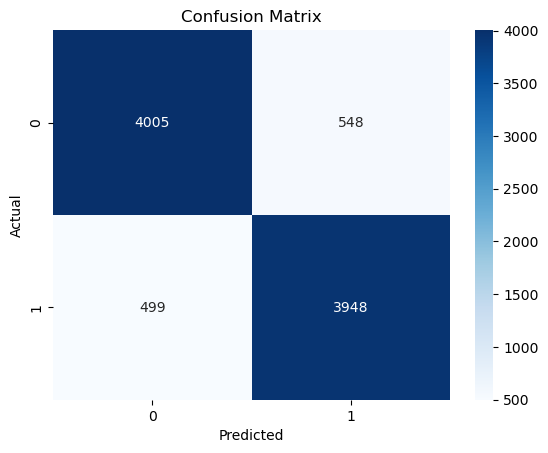

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = tfidf.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    sentiment = 'Positive' if prediction == 1 else 'Negative'
    return sentiment


In [21]:
print(predict_sentiment("I love this product, it's amazing!"))
print(predict_sentiment("This is the worst thing I've ever bought."))


Positive
Negative
